# 신경망 생성
- `torch.nn` 패키지 사용

- **`nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함**

- 파이토치에서 신경망 생성을 위한 기본 틀

    ```python
      class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()
    ```

- **`conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함**

        

<br>

<br>

## 신경망 정의

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)
    self.fcl = nn.Linear(in_features=16 * 6 * 6, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=10)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1

    for s in size:
      num_features += s

    return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fcl): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


<br>

<br>

<br>

# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

<br>

<br>

## modules import

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

<br>

<br>

## 데이터 생성 및 회귀식 설정

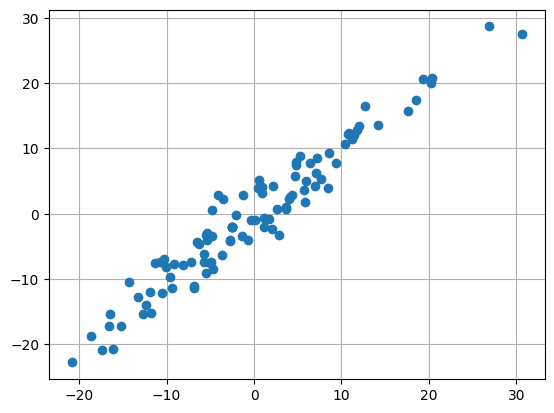

In [22]:
X = torch.randn(100, 1)*10
Y = X + 3 * torch.randn(100, 1)

plt.plot(X.numpy(), Y.numpy(), 'o')
plt.grid()
plt.show()

<br>

<br>

## 신경망 구성

In [23]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    pred = self.linear(x)
    return pred


<br>

<br>

## 모델 생성 및 파라미터 확인

In [24]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


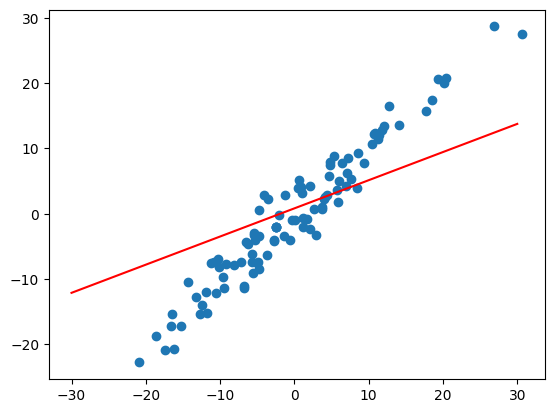

In [26]:
w, b = model.parameters()

def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

plot_fit('Initial Model')

<br>

<br>

## 손실함수와 옵티마이저

<br>

#### `torch.nn.MSELoss()`

In [27]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

<br>

<br>

## 모델 학습

In [28]:
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, Y)
  losses.append(loss)
  loss.backward()

  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch" {:.3f}\tLoss: {:.4f}'.format(epoch+1, loss))

losses_ = [v.detach().numpy() for v in losses]

Epoch" 1.000	Loss: 41.1629
Epoch" 11.000	Loss: 8.0912
Epoch" 21.000	Loss: 7.7060
Epoch" 31.000	Loss: 7.6681
Epoch" 41.000	Loss: 7.6351
Epoch" 51.000	Loss: 7.6035
Epoch" 61.000	Loss: 7.5731
Epoch" 71.000	Loss: 7.5439
Epoch" 81.000	Loss: 7.5159
Epoch" 91.000	Loss: 7.4889


<br>

<br>

## 시각화

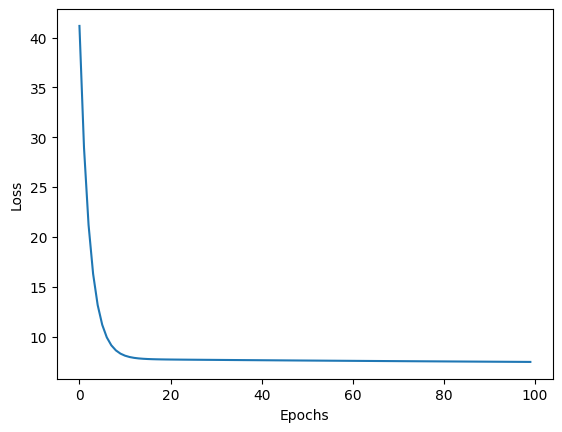

In [39]:
plt.plot(range(epochs), losses_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

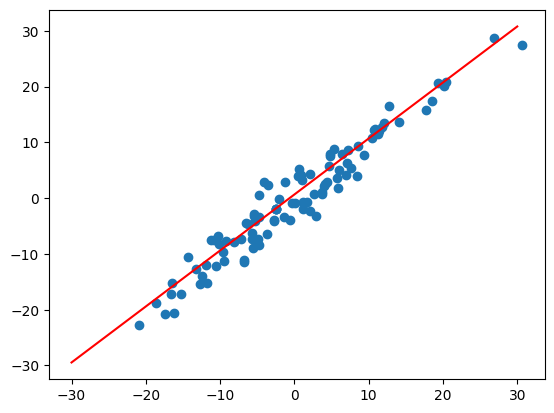

In [40]:
plot_fit("Trained Model")